# Praca domowa 2

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import  tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

## Wczytanie danych

In [56]:
australia_df = pd.read_csv("australia.csv")
australia_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [57]:
australia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

## Podział danych na zbiór treningowy i testowy

In [58]:
y = np.array(australia_df['RainTomorrow'])
X = australia_df.drop(['RainTomorrow'], axis = 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
print(X.shape,X_train.shape, X_test.shape)

(56420, 17) (39494, 17) (16926, 17)


## Modelowanie i miary oceny klasyfikatorów

### Naiwny Bayesowski

In [61]:
nb = GaussianNB(var_smoothing=1e-10)
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)

# var_smoothingfloat, default=1e-9
# Portion of the largest variance of all features that is added to variances for calculation stability.

#### Krzywa ROC

roc_auc_score for Naive Bayes Classifier 0.8485212645156712


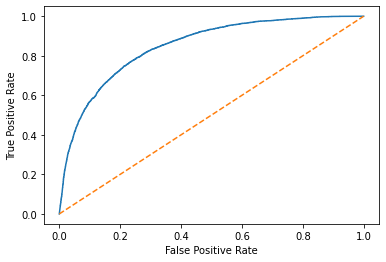

In [62]:
y_score_nb = nb.predict_proba(X_test)[:,1]
false_positive_rate_nb, true_posotive_rate_nb, thresholds_nb = roc_curve(y_test, y_score_nb)
print('roc_auc_score for Naive Bayes Classifier', roc_auc_score(y_test, y_score_nb))
plt.plot(false_positive_rate_nb, true_posotive_rate_nb)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Accuracy

In [63]:
accuracy_score(y_test, pred_nb)

0.8001890582535743

#### Precision

In [64]:
precision_score(y_test, pred_nb)

0.5407220822837951

#### Recall

In [65]:
recall_score(y_test, pred_nb)

0.683289124668435

### Regresja logistyczna

In [66]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

# max_iterint, default=100
# Maximum number of iterations taken for the solvers to converge.

#### Krzywa ROC

roc_auc_score for Logistic Regression 0.8813592934570907


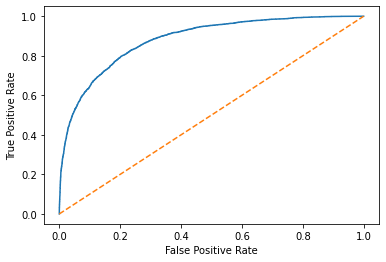

In [67]:
y_score_lr = lr.predict_proba(X_test)[:,1]
false_positive_rate_lr, true_posotive_rate_lr, thresholds_lr = roc_curve(y_test, y_score_lr)
print('roc_auc_score for Logistic Regression', roc_auc_score(y_test, y_score_lr))
plt.plot(false_positive_rate_lr, true_posotive_rate_lr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Accuracy

In [68]:
accuracy_score(y_test, pred_lr)

0.8550750324943873

#### Precision

In [69]:
precision_score(y_test, pred_lr)

0.7437985931136616

#### Recall

In [70]:
recall_score(y_test, pred_lr)

0.5328912466843502

### Drzewo decyzyjne

In [76]:
treed = tree.DecisionTreeClassifier(max_depth = 3, random_state = 1)
treed.fit(X_train, y_train)
pred_treed = treed.predict(X_test)

# max_depth int, default=None
# The maximum depth of the tree. 
# If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### Krzywa ROC

roc_auc_score for Decision Tree 0.8240093072076119


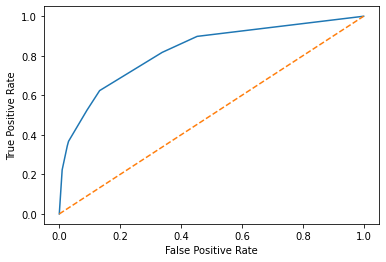

In [72]:
y_score_treed = treed.predict_proba(X_test)[:,1]
false_positive_rate_treed, true_posotive_rate_treed, thresholds_treed = roc_curve(y_test, y_score_treed)
print('roc_auc_score for Decision Tree', roc_auc_score(y_test, y_score_treed))
plt.plot(false_positive_rate_treed, true_posotive_rate_treed)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Accuracy

In [73]:
accuracy_score(y_test, pred_treed)

0.8354602386860451

#### Precision

In [74]:
precision_score(y_test, pred_treed)

0.7759103641456583

#### Recall

In [75]:
recall_score(y_test, pred_treed)

0.3673740053050398

## Porównanie klasyfikatorów

`AUC` i `Accuracy` zmierzyły nasze klasyfikatory podobnie - w obu tych miarach wygrywa z niewielką przewagą regresja logistyczna. Współczynniki są również dość wysokie - powyżej 0.8. W mierze `precision` widać już wyraźny rozjazd - zdecydowanie lepiej radzą sobie drzewo decyzyjne i regresja logistyczna (oba około 0.75), zaś naiwny bayesowski klasyfikator w tej mierze ledwie przekroczył 0.5. Zupełnie odwrotnie sytuacja ma się w przypadku miary `recall` - tutaj najlepiej radzi sobie naiwny bayesowski klasyfikator (prawie 0.7), regresja logistyczna osiąga nieco ponad 0.5, zaś drzewo decyzyjne nie radzi sobie zupełnie - około 0.35. Trudno w tej sytuacji zdecydować o jednym zwycięzcy, ale gdybym miała wybierać, postawiłabym na regresję logistyczną.